# Studying taxi rides data and the impact of external factors on rides

# Introduction 
In this project, we will analyze how many rides each taxi company completed on November 15-16, 2017, and top neighborhoods by the number of drop-offs. In addition, we will test the statistical hypothesis regarding the dependency of trip duration on weather conditions.

# 1. Analyzing number of rides completed by taxi companies and top neighborhoods by number of dropoffs

First of all, will load the data and the libraries that we will use in this project.

In [1]:
# Loading all required libraries
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
# Loading the data files into different DataFrames
companies=pd.read_csv('/datasets/project_sql_result_01.csv')
trips=pd.read_csv('/datasets/project_sql_result_04.csv')

We will display general data info and a sample of the data.

In [3]:
# printing the general/summary information about the companies table
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# printing a sample of data from companies table
companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
# printing the general/summary information about the trips table
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
# printing a sample of data from trips table
trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


The columns look to be in the correct formats and no values are missing.

Next, we will identify the top 10 neighborhoods in terms of drop-offs.

In [7]:
#printing top 10 neighborhoods in terms of drop-offs
trips.sort_values('average_trips',ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In addition, we will plot graphs showing the number of rides completed by companies and the top 10 neighborhoods by the number of drop-offs.

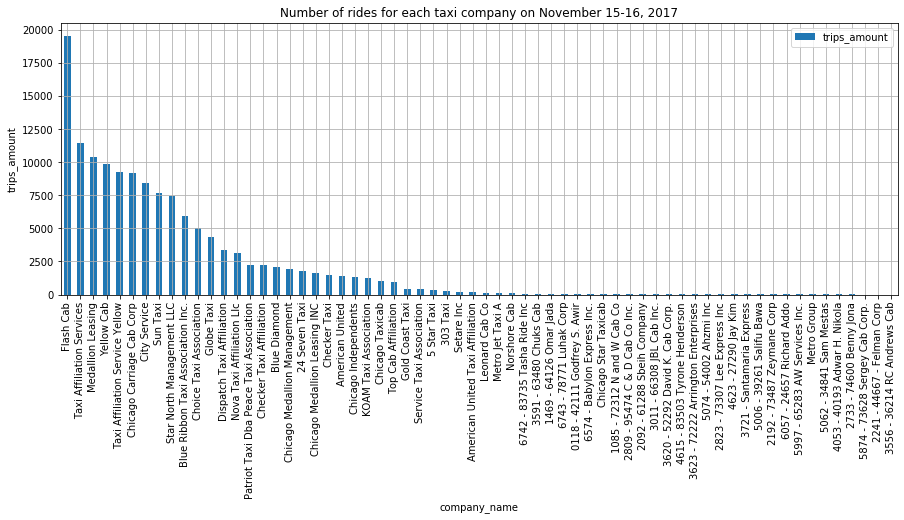

In [8]:
#plotting graphs showing number of rides completed by companies
companies.sort_values('trips_amount',ascending=False).plot(kind='bar', x='company_name', figsize=(15,5), grid=True)
plt.title('Number of rides for each taxi company on November 15-16, 2017')
plt.ylabel('trips_amount')
plt.show()

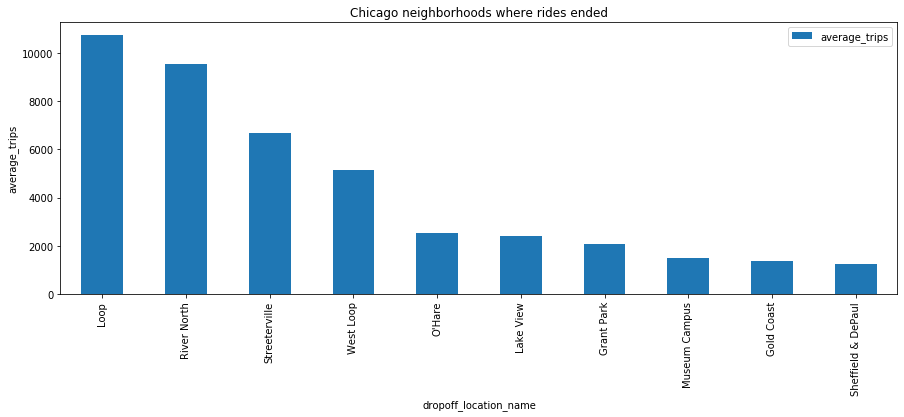

In [9]:
#plotting graphs showing top 10 neighborhoods by number of dropoffs
trips.sort_values('average_trips',ascending=False).head(10).plot(kind='bar', x='dropoff_location_name', figsize=(15,5))
plt.title('Chicago neighborhoods where rides ended')
plt.ylabel('average_trips')
plt.show()

As can be seen, Flash Cab made a significantly larger number of trips than any other company (almost 20000). Eight companies made between 7500 and 12500 trips, and 5 companies made between 2500 and 7500 trips. The rest of the companies made less than 2500 trips.

Loop neighborhood is leading by the number of drop-offs followed by River North and Streeterville neighborhoods. Sheffield & DePaul is closing the list of top ten neighborhoods by the number of drop-offs.

# 2. Testing hypothesis

We will test the statistical hypothesis regarding the dependency of trip duration on weather conditions. We will test the hypothesis that the means of the two statistical populations are equally based on samples taken from them. To do this we will apply the method scipy.stats.ttest_ind. We will use a critical statistical significance level - alpha = 0.05. We will compare the p-value returned by scipy.stats.ttest_ind will be with alpha. If the p-value will be less than alpha, we will reject the hypothesis, otherwise, we will keep the hypothesis.

We will formulate null hypotheses as "The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays". The alternative hypothesis will be "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays". Before testing the hypothesis, we will compare the variances of the samples in order to understand with which equal_var parameter to use the ttest_ind test method. For this, we will use Levene's statistic test. The Center parameter in Levene's test depends on data distribution. So, we will check the data distribution first in order to determine which value for this parameter we should use.

The weather dataset was received by us in the previous stages of the project and does not require data preprocessing.

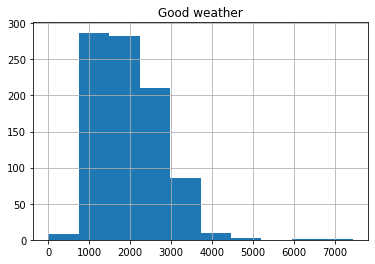

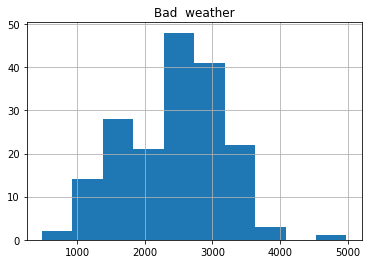

In [10]:
#loading data
weather=pd.read_csv('/datasets/project_sql_result_07.csv')

#slicing data into good and bad weather tables
good_weather_trips_duration=weather.query('weather_conditions=="Good"')['duration_seconds']
bad_weather_trips_duration=weather.query('weather_conditions=="Bad"')['duration_seconds']
#plotting histograms for sliced tables
good_weather_trips_duration.hist()
plt.title('Good weather')
plt.show()
bad_weather_trips_duration.hist()
plt.title('Bad  weather')
plt.show()

Data is skewed, so we will use the median as a value for the center parameter in Levene's test.

In [11]:
#performing Levene's test
stat, p = st.levene(good_weather_trips_duration, bad_weather_trips_duration, center='median')
p

0.5332038671974493

The high p-value suggests that the populations have quite similar variances. Therefore, we will use equal_var=True

In [12]:
#Testing the hypothesis
results = st.ttest_ind(good_weather_trips_duration, bad_weather_trips_duration, equal_var=True)

#printing p-value received in the test
print('p-value: ', results.pvalue)

p-value:  6.517970327099473e-12


As can be seen, the p-value is much lower than the alpha. Such a small p-value tells us that there is an extremely low probability of randomly getting a trip duration difference that size or larger. In other words, the difference in trip duration on rainy and sunny days is not random. Therefore, we are rejecting the null hypothesis.

# General conclusion

We analyzed how many rides each taxi company completed on November 15-16, 2017, and top neighborhoods by the number of drop-offs. Based on the analysis, Flash Cab made a significantly larger number of trips than any other company, and Loop neighborhood is leading by the number of drop-offs followed by River North and Streeterville.

Also, we tested a statistical hypothesis regarding the dependency of trip duration on weather conditions. Based on the tests we rejected the hypothesis formulated as “The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays". So, it looks like the average ride duration is larger on rainy days.